In [161]:
#Import Dependencies
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [139]:
#Reading and cleaning "Human Development Index" Data
humanDevIndex=pd.read_csv("Resources/HumanDevelopmentIndex.csv")
humanDevIndex=humanDevIndex.dropna(how='any')
humanDevIndex=humanDevIndex.rename(columns={"Country":"Country Name"})
humanDevIndex=humanDevIndex.iloc[:,0:28]
humanDevIndex.iloc[:,2:28]=humanDevIndex.iloc[:,2:28].astype(float)
for i in range(2,28):
    humanDevIndex.iloc[:,i]=humanDevIndex.iloc[:,i].map("{:.2f}".format)

humanDevIndex.head()


,HDI Rank (2018),Country Name,1990,1991,1992,1993,1994,1995,1996,1997,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,170,Afghanistan,0.30,0.30,0.31,0.31,0.30,0.33,0.33,0.34,...,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.48,0.49,0.49
1,69,Albania,0.64,0.62,0.61,0.61,0.62,0.63,0.64,0.64,...,0.71,0.72,0.72,0.73,0.74,0.76,0.77,0.78,0.79,0.79
2,82,Algeria,0.58,0.58,0.59,0.59,0.60,0.60,0.61,0.62,...,0.70,0.71,0.71,0.72,0.73,0.74,0.74,0.75,0.75,0.75
6,48,Argentina,0.71,0.71,0.72,0.72,0.73,0.73,0.74,0.75,...,0.80,0.81,0.81,0.81,0.82,0.82,0.82,0.82,0.82,0.83
7,81,Armenia,0.63,0.63,0.58,0.59,0.60,0.60,0.61,0.62,...,0.71,0.72,0.73,0.72,0.73,0.73,0.74,0.74,0.75,0.75


In [140]:
humanDevIndex["Country Name"].count()

158

In [141]:
#Reading and cleaning "Energy Consumption" Data
energyCons=pd.read_csv("Resources/TheWorldBank/EnergyConsumption.csv")
energyCons=energyCons.dropna(how='any')
energyCons=energyCons.iloc[:,2:30]
rename_map = {}
for columns in energyCons.columns:
    if '[' in columns:
         rename_map[columns] = columns.split()[0]

energyCons=energyCons.rename(columns=rename_map)
energyCons=energyCons.dropna(how='any')
energyCons.dtypes
energyCons.iloc[:,2:28]=energyCons.iloc[:,2:28].astype(float)
for i in range(2,28):
    energyCons.iloc[:,i]=energyCons.iloc[:,i].map("{:.2f}".format)

energyCons.head()

,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,AFG,15.92,17.04,26.52,30.59,32.80,35.08,37.95,41.43,...,37.14,33.86,21.34,17.81,14.84,11.48,13.97,16.33,19.31,18.42
1,Albania,ALB,25.52,33.00,46.81,51.15,51.46,50.61,51.64,55.95,...,31.71,32.10,35.91,37.22,37.12,35.96,40.05,41.29,38.69,38.62
2,Algeria,DZA,0.18,0.32,0.29,0.48,0.40,0.42,0.39,0.47,...,0.41,0.41,0.30,0.31,0.26,0.18,0.19,0.14,0.07,0.06
3,American Samoa,ASM,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.70,0.70,0.70,0.89
4,Andorra,AND,14.27,14.27,14.31,13.92,14.56,14.48,14.10,14.19,...,17.49,16.94,17.42,17.52,19.09,18.97,19.20,19.56,19.89,19.75


In [142]:
energyCons["Country Name"].count()

243

In [143]:
#Merging two datasets
merged_df=pd.merge(humanDevIndex,energyCons,on="Country Name",how='outer')
merged_df=merged_df.dropna(how='any')
merged_df.head()

,HDI Rank (2018),Country Name,1990_x,1991_x,1992_x,1993_x,1994_x,1995_x,1996_x,1997_x,...,2006_y,2007_y,2008_y,2009_y,2010_y,2011_y,2012_y,2013_y,2014_y,2015_y
0,170,Afghanistan,0.30,0.30,0.31,0.31,0.30,0.33,0.33,0.34,...,37.14,33.86,21.34,17.81,14.84,11.48,13.97,16.33,19.31,18.42
1,69,Albania,0.64,0.62,0.61,0.61,0.62,0.63,0.64,0.64,...,31.71,32.10,35.91,37.22,37.12,35.96,40.05,41.29,38.69,38.62
2,82,Algeria,0.58,0.58,0.59,0.59,0.60,0.60,0.61,0.62,...,0.41,0.41,0.30,0.31,0.26,0.18,0.19,0.14,0.07,0.06
3,48,Argentina,0.71,0.71,0.72,0.72,0.73,0.73,0.74,0.75,...,10.19,8.89,7.61,8.57,8.96,10.12,9.87,10.21,10.90,10.04
4,81,Armenia,0.63,0.63,0.58,0.59,0.60,0.60,0.61,0.62,...,7.65,7.02,6.41,7.80,9.36,8.01,6.57,6.77,7.72,15.79


In [144]:
merged_df["Country Name"].count()

127

In [145]:
rename_value = {}
for countries in merged_df["Country Name"]:
    if ' (' in countries:
         rename_value[countries]=countries.split(" (")[0]
    else:
        merged_df["Country Name"]=merged_df["Country Name"]

merged_df["Country Name"]=merged_df["Country Name"].replace(rename_value)

#merged_df["Country Name"]=merged_df["Country Name"].rename(rows={"Yemen, Rep.":"Yemen"})

merged_df=merged_df.groupby("Country Name").sum().reset_index()
merged_df=merged_df.dropna(how='any')
del merged_df["Country Code"]




In [146]:
merged_df=merged_df.drop([33],axis=0)

In [147]:
merged_df.iloc[:,2:52]=merged_df.iloc[:,2:52].astype(float)

In [148]:

merged_df.columns

Index(['Country Name', 'HDI Rank (2018)', '1990_x', '1991_x', '1992_x',
       '1993_x', '1994_x', '1995_x', '1996_x', '1997_x', '1998_x', '1999_x',
       '2000_x', '2001_x', '2002_x', '2003_x', '2004_x', '2005_x', '2006_x',
       '2007_x', '2008_x', '2009_x', '2010_x', '2011_x', '2012_x', '2013_x',
       '2014_x', '2015_x', '1990_y', '1991_y', '1992_y', '1993_y', '1994_y',
       '1995_y', '1996_y', '1997_y', '1998_y', '1999_y', '2000_y', '2001_y',
       '2002_y', '2003_y', '2004_y', '2005_y', '2006_y', '2007_y', '2008_y',
       '2009_y', '2010_y', '2011_y', '2012_y', '2013_y', '2014_y', '2015_y'],
      dtype='object')

In [173]:
merged_df["Total HDI"]=merged_df.iloc[:,2:27].sum(axis=1)
#average 
merged_df["Avg Renewable Energy Share 2010-2015"]=merged_df.iloc[:,47:52].sum(axis=1)/5
merged_df["Avg Renewable Energy Share 2004-2009"]=merged_df.iloc[:,41:52].sum(axis=1)/5
#avg renewable energy share 2010-2015 -- avg reneweable energy share 2004-2009
merged_df["Renewable Energy Share Change 2004-2009 vs 2010-2015"]=merged_df.iloc[:,54]-(merged_df.iloc[:,41:46].sum(axis=1)/5)

merged_df["Total Energy Consumption"]=merged_df.iloc[:,28:52].sum(axis=1)
merged_df["Avg HDI"]=merged_df.iloc[:,2:27].mean(axis=1)
merged_df["Avg HDI 2004-2015"]=merged_df.iloc[:,16:27].mean(axis=1)
merged_df["Avg Energy Consumption"]=merged_df.iloc[:,28:52].mean(axis=1)

In [174]:
merged_df

,Country Name,HDI Rank (2018),1990_x,1991_x,1992_x,1993_x,1994_x,1995_x,1996_x,1997_x,...,2014_y,2015_y,Total HDI,Avg Renewable Energy Share 2010-2015,Renewable Energy Share Change 2004-2009 vs 2010-2015,Total Energy Consumption,Avg HDI,Avg HDI 2004-2015,Avg Energy Consumption,Avg Renewable Energy Share 2004-2009
0,Afghanistan,170,0.3,0.3,0.31,0.31,0.3,0.33,0.33,0.34,...,19.31,18.42,9.59,14.886,9.141818,785.43,0.3836,0.448182,32.726250,4.8952
1,Albania,69,0.64,0.62,0.61,0.61,0.62,0.63,0.64,0.64,...,38.69,38.62,17.14,38.328,16.402727,973.24,0.6856,0.737273,40.551667,11.0936
2,Algeria,82,0.58,0.58,0.59,0.59,0.6,0.6,0.61,0.62,...,0.07,0.06,16.63,0.216,15.909091,9.06,0.6652,0.720909,0.377500,3.3692
3,Argentina,48,0.71,0.71,0.72,0.72,0.73,0.73,0.74,0.75,...,10.90,10.04,19.31,9.546,18.501818,243.71,0.7724,0.808182,10.154583,5.7712
4,Armenia,81,0.63,0.63,0.58,0.59,0.6,0.6,0.61,0.62,...,7.72,15.79,16.71,7.702,15.988182,197.49,0.6684,0.721818,8.228750,4.8824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,United Kingdom,15,0.78,0.79,0.8,0.81,0.83,0.84,0.84,0.85,...,7.40,8.71,21.64,4.438,20.740000,43.47,0.8656,0.900000,1.811250,5.2156
121,Uruguay,57,0.69,0.7,0.7,0.7,0.71,0.71,0.72,0.73,...,55.39,58.02,18.63,48.924,17.855455,1012.62,0.7452,0.774545,42.192500,13.5108
122,World,,0.6,0.6,0.6,0.61,0.61,0.62,0.62,0.62,...,17.87,18.05,16.36,17.432,15.668182,419.40,0.6544,0.691818,17.475000,6.7584
123,Zambia,143,0.42,0.42,0.42,0.42,0.42,0.42,0.42,0.42,...,88.03,87.99,11.66,90.440,11.143636,2125.79,0.4664,0.516364,88.574583,20.4200


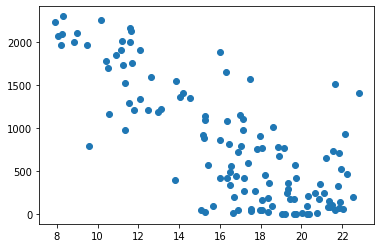

In [175]:
plt.scatter(merged_df["Total HDI"], merged_df["Total Energy Consumption"])

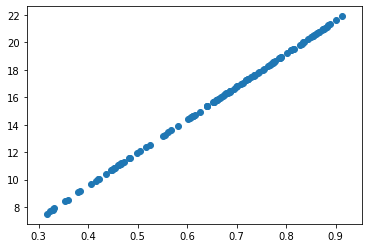

In [176]:
plt.scatter(merged_df["Avg HDI"], merged_df["Renewable Energy Share Change 2004-2009 vs 2010-2015"])


Text(0.32, 11, 'y = 24.62x + -1.4')

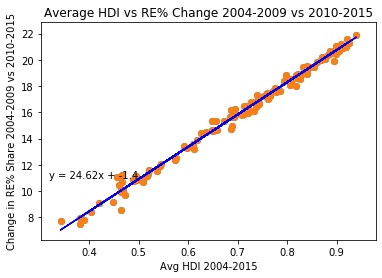

In [177]:
plt.scatter(merged_df["Avg HDI 2004-2015"], merged_df["Renewable Energy Share Change 2004-2009 vs 2010-2015"])
plt.title("Average HDI vs RE% Change 2004-2009 vs 2010-2015")
plt.xlabel("Avg HDI 2004-2015")
plt.ylabel("Change in RE% Share 2004-2009 vs 2010-2015")

x_values = merged_df["Avg HDI 2004-2015"]
y_values = merged_df["Renewable Energy Share Change 2004-2009 vs 2010-2015"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "b")
plt.annotate(line_eq, (0.32, 11), fontsize = 10, color = "black")